In [ ]:
# import necessary library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# import file
df2021 = pd.read_csv('/content/drive/MyDrive/DS-project/df2021.csv')
df2019 = pd.read_csv('/content/drive/MyDrive/DS-project/df2019.csv')

In [ ]:
def exageration_cleaning(input_series, axis):
    input_series.replace(r'กกก+', 'ก')
    input_series.replace(r'งงง+', 'ง')
    input_series.replace(r'จจจ+', 'จ')
    input_series.replace(r'ชชช+', 'ช')
    input_series.replace(r'ซซซ+', 'ซ')
    input_series.replace(r'ดดด+', 'ด')
    input_series.replace(r'ทท+', 'ท')
    input_series.replace(r'นนน+', 'น')
    input_series.replace(r'บบบ+', 'บ')
    input_series.replace(r'ปปป+', 'ป')
    input_series.replace(r'มมม+', 'ม')
    input_series.replace(r'ยย+', 'ย')
    input_series.replace(r'รรร+', 'ร')
    input_series.replace(r'ลลล+', 'ล')
    input_series.replace(r'ววว+', 'ว')
    input_series.replace(r'สสส+', 'ส')
    input_series.replace(r'หห+', 'ห')
    input_series.replace(r'เออ+', 'เออ')
    input_series.replace(r'เอ้อ+', 'เอ้อ')
    input_series.replace(r'อ่อ+', 'อ่อ')
    input_series.replace(r'ท้อ+', 'ท้อ')
    input_series.replace(r'หรอ+', 'หรอ')
    input_series.replace(r'แกร+', 'แก')
    input_series.replace(r'คือ+', 'คือ')
    input_series.replace(r'จริง+', 'จริง')
    input_series.replace(r'หือ+', 'หือ')
    input_series.replace(r'ตลก+', 'ตลก')
    input_series.replace(r'แล้ว+', 'แล้ว')
    input_series.replace(r'า+', 'า')
    input_series.replace(r'ะ+', 'ะ')
    input_series.replace(r'5+', '')
    input_series.replace(r' [h,t,p]{4}s?[:,/]{3}[t,.,c,o,/]{5}\w{5}\w{5}', '')
    input_series.replace(r'@\w+\W?', '')
    input_series.replace(r'\n', ' ')
    input_series.replace('&amp;','&')
    input_series.replace('-&gt;', '')
    return input_series

In [ ]:
df2019['text'] = df2019['text'].apply(exageration_cleaning, axis=1)
df2021['text'] = df2021['text'].apply(exageration_cleaning, axis=1)

In [ ]:
df2019.to_csv('/content/drive/MyDrive/DS-project/df2019_cleaned.csv')
df2021.to_csv('/content/drive/MyDrive/DS-project/df2021_cleaned.csv')

Split positive and negative tweets equally

In [ ]:
df2021_pos = df2021[df2021['sentiment'] == 'pos']
df2021_neg = df2021[df2021['sentiment'] == 'neg']
df2019_pos = df2019[df2019['sentiment'] == 'pos']
df2019_neg = df2019[df2019['sentiment'] == 'neg']
print('positive tweets count in 2021 : {}'.format(df2021_pos.shape[0]))
print('negative tweets count in 2021 : {}'.format(df2021_neg.shape[0]))
print('positive tweets count in 2019 : {}'.format(df2019_pos.shape[0]))
print('negative tweets count in 2019 : {}'.format(df2019_neg.shape[0]))

positive tweets count in 2021 : 80
negative tweets count in 2021 : 1324
positive tweets count in 2019 : 459
negative tweets count in 2019 : 2136


In [ ]:
df2021_neg_rand = df2021_neg.sample(n=df2021_pos.shape[0], random_state = 123)
df2021_neg_rand.shape[0]

80

In [ ]:
df2019_neg_rand = df2019_neg.sample(n=df2019_pos.shape[0], random_state = 123)
df2019_neg_rand.shape[0]

459

In [ ]:
df2021_bal = pd.concat([df2021_pos, df2021_neg_rand])
df2021_bal.shape[0]

160

In [ ]:
df2019_bal = pd.concat([df2019_pos, df2019_neg_rand])
df2019_bal.shape[0]

918

In [ ]:
df2019_bal['sentiment'].value_counts()

pos    459
neg    459
Name: sentiment, dtype: int64

In [ ]:
# install pythainlp 
!pip install pythainlp

     |████████████████████████████████| 11.5 MB 5.1 MB/s 


# Data Preprocessing

## Reference 

In [ ]:
from pythainlp.corpus.common import thai_stopwords
thai_stopwords = list(thai_stopwords())
len(thai_stopwords)

1030

In [ ]:
from pythainlp import word_tokenize
def text_process(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":", "!", '"', "ๆ", "ฯ"))
    final = word_tokenize(final)
    final = " ".join(word for word in final)
    final = " ".join(word for word in final.split() 
                     if word not in thai_stopwords)
    return final
df2019_bal['text_tokens'] = df2019_bal['text'].apply(text_process)
df2019_bal['text_tokens'].values

array(['โอน เงิน แม่ค้า เก้า โมง เก้า โมง เค้า ems 1656 มาถึง ไว แม่ กทม ปทุม # ไปรษณีย์ ไทย',
       'ไว ลงทะเบียน 3 ตอนแรก นึก ติด ปีใหม่ ขอบคุณ นะคะ ☺️ # ไปรษณีย์ ไทย',
       'แสน ประทับใจ 4 เดี๋ยวนี้ สุดยอด แม่ 55555 # ไปรษณีย์ ไทย',
       'เออออ ลูกค้า ตอนเช้า 6 โมง เย็น ลูกค้า ทัก บอ ไว ดีมาก เวอร์ ลูกค้า ประทับใจ ดีใจ ลูกค้า กก กก # ไปรษณีย์ ไทย',
       '# ไปรษณีย์ \u200b มาแรง กก \u200b ลูกค้า จันทร์ \u200b ภาคเหนือ ตอน ล่าง ปลายทาง ภาคอีสาน ตอนเย็น อังคาร \u200b ลูก ค้้า สินค้า \u200b ตอนแรก นึก \u200b กลาง \u200b \u200b เหนือ \u200b พรุ่งนี้ \u200b อีสาน \u200b ทับ ใจ อะ \u200b 👍🏻👍🏻👍🏻👍🏻👏🏻👏🏻👏🏻👏🏻👏🏻 # ไปรษณีย์ ไทย',
       'รัก ไปรษณีย์ ไทย 1820 ร เว่ย มือ เปื้อน อ่ะ เซ็น เเล้ว พี่ เค้า บอ เดี๋ยว พี่ แอบ เกรง ใจเบา เรื่อง ที่มา ตอนเย็น ( ปกติ ) เรื่อง เซ็น ㅠㅠ # ไปรษณีย์ ไทย',
       'มีปัญหา ไปรษณีย์ ไทย กล่อง สภาพ ดี ไว # ไปรษณีย์ ไทย',
       'ลุง ปณ ถึงที่ 😊 ขอบคุณ # ไปรษณีย์ ไทย',
       ',, ง # ไปรษณีย์ ไทย เดี๋ยวนี้ ตอน ย้าย ห้อง roll pallet ( ใส่ แม่ ) จา กช มมาก ทม ทบ

In [ ]:
X = df2019_bal[['text_tokens']]
y = df2019_bal['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(analyzer=lambda x:x.split(' '))
cvec.fit_transform(X_train['text_tokens'])
#cvec.vocabulary_

<642x2559 sparse matrix of type '<class 'numpy.int64'>'
	with 11476 stored elements in Compressed Sparse Row format>

In [ ]:
train_bow1 = cvec.transform(X_train['text_tokens'])
pd.DataFrame(train_bow1.toarray(), columns=cvec.get_feature_names(), index=X_train['text_tokens'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,#,#กํา,#ช้อป,#ปณ,#ลทบ,#สม,&,(,(จ,(ลง,...,🤣🤣,🤦🏻‍♂️,🤦🏻♀️,🤨,🤬,🤬🤬🤬🤬,🤭,🤯🤯🤯,🥰,🥳
text_tokens,,,,,,,,,,,,,,,,,,,,,
บริการ # Kerryexpress # ไปรษณีย์ ไทย อ่ะ บ้าน ที่ทำงาน แม่ คนรับ,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
พี่ # ไปรษณีย์ ไทย ไลน์ พี่ ร พัสดุ คน พี่ แกก็จะ ไลน์ รูป บอ วาง ตรงนี้ รู้สึก เหมือน ซี้ 55555 ปล ประตู หมา บ้าน วิ่ง -,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ไปรษณีย์ ไทย ขอบคุณ สำหรับ บริการ แย่มาก ข้างใน หนังสือ คนรัก หนังสือ รู้สึก เหรอ # ไปรษณีย์ ไทย,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
เด๊่ยว ไปรษณีย์ ไทย ดีงาม EMS ตอนเช้า เย็น ตกใจ กก กก เค้า บอ EMS Same Day 11 โมง เช้า วันเดียวกัน ดี เวอร์ # ไปรษณีย์ ไทย # ดี ชม,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
พี่ ร ที่มา ดีมาก บ้าน พี่ รั้ว เดิน วาง ให้หน้า ประตู รั้ว ล็อค ฝาก ยาม น่ารัก ปณ หลัก แถม พี่ โยน ชื่นชม สั่ง สนิท พี่ รแน้ว 5555 # ไปรษณีย์ ไทย,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ร้าน เสาร์ 23 กุมภา ตอนนี้ 3 มีนา มาถึง ล่าช้า # ไปรษณีย์ ไทย,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
โทร แจ้ง เวลา สะดวก พ่อ ง เรื่อง ดี ประสานงาน รัย เรื่อง ปาก ทำงาน แบบนี้ ห่วย โอกาส อีกแล้ว แดก เงิน กรู แน่ รู้ เงิน กี่ บาท เมิง ตาย กรู ตาย จ่าย มรึง # นินจา แวน # ห่วย เห้ # ไปรษณีย์ ไทย # ดีกว่า,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ชอบ # ไปรษณีย์ ไทย ไม่ต้อง โทร หา วุ่นวาย นึง ที่อยู่ ชื่อ ร้านค้า ด่วน รอ สอง ลอง ถาม อ๋อ ลูกค้า เบอร์ โทร What,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.linear_model import LogisticRegression
lr_unclean = LogisticRegression()
lr_unclean.fit(train_bow1, y_train)

LogisticRegression()

In [ ]:
test_bow1 = cvec.transform(X_test['text_tokens'])
test_predictions = lr_unclean.predict(test_bow1)
print(classification_report(test_predictions, y_test))

              precision    recall  f1-score   support

         neg       0.88      0.82      0.85       145
         pos       0.82      0.88      0.85       131

    accuracy                           0.85       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.85      0.85      0.85       276



In [ ]:
y_test

2390    pos
1882    pos
1808    pos
1761    pos
1935    pos
       ... 
1550    pos
855     pos
1798    pos
1839    pos
2309    pos
Name: sentiment, Length: 276, dtype: object

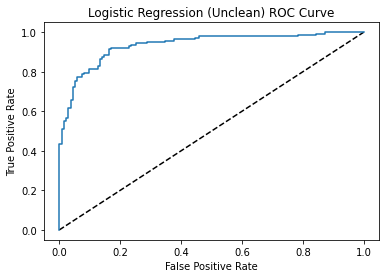

In [ ]:
y_pred_prob = lr_unclean.predict_proba(test_bow)[:,1]
fpr, tpr, thresholds = roc_curve(y_test.map({'pos':1, 'neg':0}), y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression (Unclean)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression (Unclean) ROC Curve')
plt.show;

### drop NaN

In [ ]:
df2019_bal['sentiment'].isna().sum()

0

In [ ]:
df2019_bal.loc[df2019_bal['sentiment'].isna(), ['text', 'sentiment']]

,text,sentiment


In [ ]:
df2021.dropna(subset=['sentiment'], inplace=True)

In [ ]:
df2021['sentiment'].isna().sum()

0

## Sui

In [ ]:
stopword_2019 = pd.read_csv('/content/drive/MyDrive/DS-project/stopword_2019.csv')
stopword_2021 = pd.read_csv('/content/drive/MyDrive/DS-project/stopword_2021.csv')

In [ ]:
list_stop_word_2019 = stopword_2019['word'].values
len(list_stop_word_2019)

2526

In [ ]:
from pythainlp.corpus.common import thai_stopwords
thai_stopwords = set(thai_stopwords())
thai_stopwords.update(list_stop_word_2019)
len(thai_stopwords)

3556

In [ ]:
from pythainlp.corpus.common import thai_stopwords
thai_stopwords = set(thai_stopwords())

In [ ]:
list_stop_word_2021 = stopword_2021['word'].values
len(list_stop_word_2021)

2292

In [ ]:
from pythainlp import word_tokenize

# Deploy Model ( without stop_word cleaning )

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
X = df2019_bal[['text_tokens']]
y = df2019_bal['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(ngram_range=(1,1))
cvec.fit_transform(X_train['text_tokens'])
cvec.vocabulary_

{'บร': 740,
 'การ': 253,
 'kerryexpress': 134,
 'ไปรษณ': 1682,
 'ไทย': 1678,
 'าน': 1322,
 'ทำงาน': 621,
 'แม': 1570,
 'คนร': 306,
 'ไลน': 1687,
 'สด': 1106,
 'คน': 303,
 'แกก': 1516,
 'จะ': 419,
 'บอ': 752,
 'วาง': 1081,
 'ตรงน': 545,
 'เหม': 1480,
 'อน': 1226,
 '55555': 66,
 'ปล': 795,
 'ประต': 785,
 'หมา': 1181,
 'ขอบค': 289,
 'สำหร': 1158,
 'แย': 1574,
 'มาก': 897,
 'างใน': 1312,
 'หน': 1171,
 'งส': 385,
 'เหรอ': 1483,
 'เด': 1407,
 'ยว': 947,
 'งาม': 397,
 'ems': 108,
 'ตอนเช': 562,
 'เย': 1444,
 'ตกใจ': 534,
 'กก': 192,
 'เค': 1386,
 'same': 158,
 'day': 103,
 '11': 10,
 'โมง': 1630,
 'เช': 1403,
 'นเด': 702,
 'ยวก': 948,
 'เวอร': 1466,
 'ชม': 433,
 'มา': 896,
 'ให': 1670,
 'อค': 1210,
 'ฝาก': 822,
 'ยาม': 957,
 'าร': 1342,
 'ปณ': 770,
 'หล': 1190,
 'แถม': 1536,
 'โยน': 1632,
 'นชม': 646,
 'สน': 1112,
 'รแน': 1015,
 '5555': 65,
 'องใจ': 1221,
 'สถานะ': 1111,
 'อธ': 1225,
 'บาย': 759,
 'าย': 1338,
 'สำเร': 1160,
 'เผลอ': 1430,
 'สแกน': 1163,
 'กล': 236,
 'อง': 1212,
 'ดท': 493,
 '

In [ ]:
train_bow = cvec.transform(X_train['text_tokens'])
pd.DataFrame(train_bow.toarray(), columns=cvec.get_feature_names(), index=X_train['text_tokens'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,,#,#กํา,#ช้อป,#ปณ,#ลทบ,#สม,&,(,(จ,...,🤘🏽,🤣,🤦🏻,🤦🏻‍♂️,🤨,🤬,🤭,🤯,🥰,🥳
text_tokens,,,,,,,,,,,,,,,,,,,,,
บริการ # Kerryexpress # ไปรษณีย์ ไทย อ่ะ บ้าน ที่ทำงาน แม่ คนรับ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
พี่ # ไปรษณีย์ ไทย ไลน์ พี่ ร พัสดุ คน พี่ แกก็จะ ไลน์ รูป บอ วาง ตรงนี้ รู้สึก เหมือน ซี้ 55555 ปล ประตู หมา บ้าน วิ่ง -,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ไปรษณีย์ ไทย ขอบคุณ สำหรับ บริการ แย่มาก ข้างใน หนังสือ คนรัก หนังสือ รู้สึก เหรอ # ไปรษณีย์ ไทย,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
เด๊่ยว ไปรษณีย์ ไทย ดีงาม EMS ตอนเช้า เย็น ตกใจ กก กก เค้า บอ EMS Same Day 11 โมง เช้า วันเดียวกัน ดี เวอร์ # ไปรษณีย์ ไทย # ดี ชม,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
พี่ ร ที่มา ดีมาก บ้าน พี่ รั้ว เดิน วาง ให้หน้า ประตู รั้ว ล็อค ฝาก ยาม น่ารัก ปณ หลัก แถม พี่ โยน ชื่นชม สั่ง สนิท พี่ รแน้ว 5555 # ไปรษณีย์ ไทย,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ร้าน เสาร์ 23 กุมภา ตอนนี้ 3 มีนา มาถึง ล่าช้า # ไปรษณีย์ ไทย,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
โทร แจ้ง เวลา สะดวก พ่อ ง เรื่อง ดี ประสานงาน รัย เรื่อง ปาก ทำงาน แบบนี้ ห่วย โอกาส อีกแล้ว แดก เงิน กรู แน่ รู้ เงิน กี่ บาท เมิง ตาย กรู ตาย จ่าย มรึง # นินจา แวน # ห่วย เห้ # ไปรษณีย์ ไทย # ดีกว่า,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ชอบ # ไปรษณีย์ ไทย ไม่ต้อง โทร หา วุ่นวาย นึง ที่อยู่ ชื่อ ร้านค้า ด่วน รอ สอง ลอง ถาม อ๋อ ลูกค้า เบอร์ โทร What,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bow, y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

In [ ]:
test_bow = cvec.transform(X_test['text_tokens'])
test_predictions = lr.predict(test_bow)
print(classification_report(test_predictions, y_test))

              precision    recall  f1-score   support

         neg       0.85      0.80      0.83       143
         pos       0.80      0.85      0.82       133

    accuracy                           0.83       276
   macro avg       0.83      0.83      0.83       276
weighted avg       0.83      0.83      0.83       276



In [ ]:
accuracy_score(test_predictions, y_test)

0.8260869565217391

# Deploy Model ( with stop_word cleaning )

In [ ]:
from pythainlp import word_tokenize
def text_process(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":", "!", '"', "ๆ", "ฯ"))
    final = word_tokenize(final)
    final = " ".join(word for word in final)
    final = " ".join(word for word in final.split() 
                     if word not in thai_stopwords)
    return final

df2019_bal['text_tokens'] = df2019_bal['text'].apply(text_process)
df2019_bal['text_tokens'].values

In [ ]:
!pip install emoji
import emoji
from pythainlp import word_tokenize, Tokenizer
from pythainlp.corpus.common import thai_words

In [ ]:
emoji_english = emoji.UNICODE_EMOJI['en']
emoji_list = [key for key in emoji_english.keys()]

custom_words_list = set(thai_words())

custom_words_list.update(emoji_list)

custom_tokenizer = Tokenizer(custom_dict=custom_words_list, engine='newmm')

In [ ]:
from pythainlp import word_tokenize
def text_process(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":", "!", '"', "ๆ", "ฯ"))
    final = custom_tokenizer.word_tokenize(final)
    final = " ".join(word for word in final)
    final = " ".join(word for word in final.split() 
                     if word not in thai_stopwords)
    return final

df2019_bal['text_tokens'] = df2019_bal['text'].apply(text_process)
df2019_bal['text_tokens']

12      โอน เงิน แม่ค้า เก้า โมง เก้า โมง เค้า ems 165...
13      ไว ลงทะเบียน 3 ตอนแรก นึก ติด ปีใหม่ ขอบคุณ นะ...
24      แสน ประทับใจ 4 เดี๋ยวนี้ สุดยอด แม่ 55555 # ไป...
30      เออออ ลูกค้า ตอนเช้า 6 โมง เย็น ลูกค้า ทัก บอ ...
31      # ไปรษณีย์ ​ มาแรง กก ​ ลูกค้า จันทร์ ​ ภาคเหน...
                              ...                        
353                       # ไปรษณีย์ ไทย ระบบ 7 เขยื้อน 😡
345     นโยบาย # ไปรษณีย์ ไทย หรอ พนักงาน ทำ หน้า เหวี...
1575    โมโห ไปรษณีย์ เตรียม บ่ายโมง ตอนนี้ โทร ถาม จั...
2216      อห 2 ออกจะ ตัว จังหวัด สาบาน EMS # ไปรษณีย์ ไทย
350     ค้าง นครราชสีมา วันที่ 6 8 อ่ะ ทางนู้น กังวล ไ...
Name: text_tokens, Length: 918, dtype: object

## word count

In [ ]:
def count_word(df):
    word_all = " ".join(text for text in df['text_tokens'])
    word_list = word_all.split(" ")
    word_dict = dict()
    for w in word_list:
        if w in word_dict.keys():
            word_dict[w] = word_dict[w] + 1
        else:
            word_dict[w] = 1

    word_count = pd.DataFrame.from_dict(word_dict, orient='index')
    word_count.reset_index(inplace=True)
    word_count.set_axis(['word', 'count'], axis=1, inplace=True)
    word_count.sort_values(by='count', ascending=False, inplace=True)
    
    return word_count

In [ ]:
wordcount_2019 = count_word(df2019)
wordcount_2019

In [ ]:
wordcount_2019.to_excel('/content/drive/MyDrive/DS-project/word_2019.xlsx')

## .

In [ ]:
X = df2019_bal[['text_tokens']]
y = df2019_bal['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
def n_grams(text_tokens, n=2):
    word1 = text_tokens.split(' ')
    text_v2 = ','.join(w for w in word1)
    for i in range(n):
        if i == 0:
            continue
        for w in range(len(word1)-(i)):
            text_v = word1[w]
            for k in range(i):   
                text_v = text_v + ' ' + word1[w+k+1]
            text_v2 = text_v2 + ',' + text_v
    return text_v2

In [ ]:
X_train['n_grams'] = X_train['text_tokens'].apply(n_grams, n=1)
X_test['n_grams'] = X_test['text_tokens'].apply(n_grams, n=1)

In [ ]:
X_train

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(analyzer=lambda x:x.split(','))
cvec.fit_transform(X_train['n_grams'])
cvec.vocabulary_

In [ ]:
train_bow2 = cvec.transform(X_train['n_grams'])
pd.DataFrame(train_bow2.toarray(), columns=cvec.get_feature_names(), index=X_train['text_tokens'])

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_cleaned_unigram = LogisticRegression()
lr_cleaned_unigram.fit(train_bow2, y_train)

LogisticRegression()

In [ ]:
from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(lr, train_bow, y_train, cv=5, scoring='accuracy')
cv_results.mean()

0.8208575581395348

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
test_bow2 = cvec.transform(X_test['n_grams'])
test_predictions = lr_cleaned_unigram.predict(test_bow2)
print(classification_report(test_predictions, y_test))

              precision    recall  f1-score   support

         neg       0.89      0.83      0.86       144
         pos       0.83      0.89      0.86       132

    accuracy                           0.86       276
   macro avg       0.86      0.86      0.86       276
weighted avg       0.86      0.86      0.86       276



In [ ]:
y_pred_prob = lr_cleaned_unigram.predict_proba(test_bow)[:,1]
fpr2, tpr2, thresholds2 = roc_curve(y_test.map({'pos':1, 'neg':0}), y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr2, tpr2, label2='Logistic Regression (Cleaned + Unigram)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression (Cleaned + Unigram) ROC Curve')
plt.show;

ValueError: ignored

In [ ]:
accuracy_score(test_predictions, y_test)

0.855072463768116

## Bigram

In [ ]:
X_train['n_grams'] = X_train['text_tokens'].apply(n_grams, n=2)
X_test['n_grams'] = X_test['text_tokens'].apply(n_grams, n=2)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(analyzer=lambda x:x.split(','))
cvec.fit_transform(X_train['n_grams'])
cvec.vocabulary_

In [ ]:
train_bow3 = cvec.transform(X_train['n_grams'])
pd.DataFrame(train_bow3.toarray(), columns=cvec.get_feature_names(), index=X_train['text_tokens'])

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_cleaned_bigram = LogisticRegression()
lr_cleaned_bigram.fit(train_bow3, y_train)

LogisticRegression()

In [ ]:
test_bow3 = cvec.transform(X_test['n_grams'])
test_predictions = lr_cleaned_bigram.predict(test_bow3)
print(classification_report(test_predictions, y_test))

              precision    recall  f1-score   support

         neg       0.90      0.82      0.86       148
         pos       0.82      0.90      0.86       128

    accuracy                           0.86       276
   macro avg       0.86      0.86      0.86       276
weighted avg       0.86      0.86      0.86       276



## Naive 

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import KFold

X = df2019_bal[['text_tokens']]
y = df2019_bal['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
X_train['n_grams'] = X_train['text_tokens'].apply(n_grams, n=1)
X_test['n_grams'] = X_test['text_tokens'].apply(n_grams, n=1)

In [ ]:
cvec = CountVectorizer(analyzer=lambda x:x.split(','))
cvec.fit_transform(X_train['n_grams'])
cvec.vocabulary_

In [ ]:
train_bow4 = cvec.transform(X_train['n_grams'])
pd.DataFrame(train_bow4.toarray(), columns=cvec.get_feature_names(), index=X_train['text_tokens'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,,#,#กํา,#ช้อป,#ปณ,#ลทบ,#สม,&,(,(จ,...,🤣🤣,🤦🏻‍♂️,🤦🏻♀️,🤨,🤬,🤬🤬🤬🤬,🤭,🤯🤯🤯,🥰,🥳
text_tokens,,,,,,,,,,,,,,,,,,,,,
บริการ # Kerryexpress # ไปรษณีย์ ไทย อ่ะ บ้าน ที่ทำงาน แม่ คนรับ,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
พี่ # ไปรษณีย์ ไทย ไลน์ พี่ ร พัสดุ คน พี่ แกก็จะ ไลน์ รูป บอ วาง ตรงนี้ รู้สึก เหมือน ซี้ 55555 ปล ประตู หมา บ้าน วิ่ง -,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ไปรษณีย์ ไทย ขอบคุณ สำหรับ บริการ แย่มาก ข้างใน หนังสือ คนรัก หนังสือ รู้สึก เหรอ # ไปรษณีย์ ไทย,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
เด๊่ยว ไปรษณีย์ ไทย ดีงาม EMS ตอนเช้า เย็น ตกใจ กก กก เค้า บอ EMS Same Day 11 โมง เช้า วันเดียวกัน ดี เวอร์ # ไปรษณีย์ ไทย # ดี ชม,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
พี่ ร ที่มา ดีมาก บ้าน พี่ รั้ว เดิน วาง ให้หน้า ประตู รั้ว ล็อค ฝาก ยาม น่ารัก ปณ หลัก แถม พี่ โยน ชื่นชม สั่ง สนิท พี่ รแน้ว 5555 # ไปรษณีย์ ไทย,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ร้าน เสาร์ 23 กุมภา ตอนนี้ 3 มีนา มาถึง ล่าช้า # ไปรษณีย์ ไทย,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
โทร แจ้ง เวลา สะดวก พ่อ ง เรื่อง ดี ประสานงาน รัย เรื่อง ปาก ทำงาน แบบนี้ ห่วย โอกาส อีกแล้ว แดก เงิน กรู แน่ รู้ เงิน กี่ บาท เมิง ตาย กรู ตาย จ่าย มรึง # นินจา แวน # ห่วย เห้ # ไปรษณีย์ ไทย # ดีกว่า,0,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ชอบ # ไปรษณีย์ ไทย ไม่ต้อง โทร หา วุ่นวาย นึง ที่อยู่ ชื่อ ร้านค้า ด่วน รอ สอง ลอง ถาม อ๋อ ลูกค้า เบอร์ โทร What,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
model_naive = MultinomialNB()
model_naive.fit(train_bow4, y_train)

MultinomialNB()

In [ ]:
test_bow4 = cvec.transform(X_test['n_grams'])
test_predictions = model_naive.predict(test_bow4)
print(classification_report(test_predictions, y_test))

              precision    recall  f1-score   support

         neg       0.89      0.89      0.89       135
         pos       0.89      0.89      0.89       141

    accuracy                           0.89       276
   macro avg       0.89      0.89      0.89       276
weighted avg       0.89      0.89      0.89       276



In [ ]:
from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(MultinomialNB, train_bow4, y_train, cv=5, scoring='accuracy')
cv_results.mean()

TypeError: ignored

In [ ]:
cv_results = cross_val_score(lr_cleaned_bigram, train_bow3, y_train, cv=5, scoring='accuracy')
cv_results.mean()

0.8224321705426355

## ROC Curve

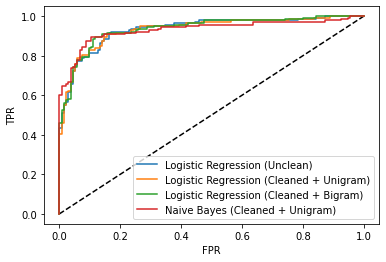

In [ ]:
from sklearn.metrics import roc_curve
y_pred_prob1 = lr_unclean.predict_proba(test_bow1)[:,1]
fpr1 , tpr1, thresholds1 = roc_curve(y_test.map({'pos':1, 'neg':0}), y_pred_prob1)

y_pred_prob2 = lr_cleaned_unigram.predict_proba(test_bow2)[:,1]
fpr2 , tpr2, thresholds2 = roc_curve(y_test.map({'pos':1, 'neg':0}), y_pred_prob2)

y_pred_prob3 = lr_cleaned_bigram.predict_proba(test_bow3)[:,1]
fpr3 , tpr3, thresholds3 = roc_curve(y_test.map({'pos':1, 'neg':0}), y_pred_prob3)

y_pred_prob4 = model_naive.predict_proba(test_bow4)[:,1]
fpr4 , tpr4, thresholds4 = roc_curve(y_test.map({'pos':1, 'neg':0}), y_pred_prob4)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= 'Logistic Regression (Unclean)')
plt.plot(fpr2, tpr2, label= 'Logistic Regression (Cleaned + Unigram)')
plt.plot(fpr3, tpr3, label= 'Logistic Regression (Cleaned + Bigram)')
plt.plot(fpr4, tpr4, label= 'Naive Bayes (Cleaned + Unigram)')
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()